In [ ]:
import numpy as np 
from scipy.special import softmax 
import time 

from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import seaborn as sns 
import networkx as nx 

import sys 
sys.path.append("..") 
from utils.env import frozen_lake
from utils.viz import viz 
viz.get_style()

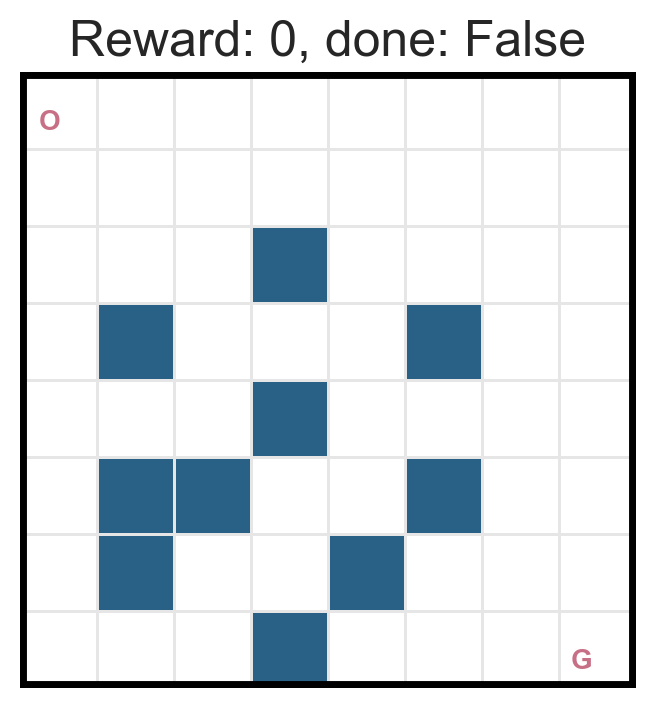

In [53]:
# The frozen lake 
layout = [
    "S.......",
    "........",
    "...H....",
    ".H...H..",
    "...H....",
    ".HH..H..",
    ".H..H...",
    "...H...G"
]
env = frozen_lake(layout, eps=0)
env.reset()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
env.render(ax)

In [54]:
s, a = 1, 2
env.p_s_next(s, a)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
s_next = 63
r, done = env.r(s_next)
r, done 

(1, True)

## MCTS: basic 

In [ ]:
# two types of nodes
class Node_s:
    type = 'state'

    def __init__(self, s, parent=None):
        self.s = s
        self.n = 1 
        self.v = 0
        self.name = f's={s}'
        self.parent = parent 
        self.children = []

class Node_a:
    type = 'action'

    def __init__(self, a, parent=None):
        self.a = a
        self.n = 1
        self.v = 0
        self.name = f'a={a}'
        self.parent = parent 
        self.children = []

## MCTS: select and expand

In [ ]:
class MTCS:

    def __init__(self, model, c=1, rng=None):
        self.model = model 
        self.c     = c
        self.rng   = rng

    def plan(self, s, max_iter=100):
        '''Plan with MCTS
        '''
        root = Node_s(s)
        for _ in range(max_iter):
            node = self.select_expand(root)
            r_sum  = self.rollout(node)
            self.backprop(node, r_sum)
        return self.uct_policy(root, c=0), root
    

In [ ]:
def viz_tree(node, deep=0):
    key = node.name
    print('    |'*deep+'--'+key)
    for child in node.children:
        viz_tree(child, deep+1)

In [ ]:
def select_expand(self, s_node):
    '''Select & expand 

    Find an s_node that is not fully expanded, expand
    it before moving to the rollout stage. 
    
    if s_node is not the termination node (usually not)
    we do:
        1. check if the current node is fully expanded
        2. if fully expanded, do select
        3. if not fully expnaded, do expand 
        4. use your mental model (self.model) to
            sample the next state (s_next), and
            the foresee the reward
        5. loop until we expand a s_node 

    hints:
        transition_fn: self.model.p_s_next(s,a)
        index a list: idx = list.index(element)
        use the random generator to do sampling: 
            self.rng.choice([], p=p)
            e.g. self.rng.choice(
                list(range(self.model.nS))), p=p) 
        construct a node: 
            s_next_node = Node_s(s=s, parent=a_node)
            a_node = Node_a(a=a. parent=s_node)
    '''
    done = False
    while s_node.s not in self.model.s_termination:

        ## get a a_node 
        if self.fully_expanded(s_node):
            a = self.uct_policy(s_node, self.c)
            #### index the node for action a ###
            #                                  #
            ####################################
        else:
            a = self.expand(s_node)
            ## add node a to s_node's children ###
            #                                    #
            ######################################
            done = True 

        # sample the next state 
        ###  sample the s_next using model ###
        #                                    #
        ######################################
        s_next_lst = [child.s for child in a_node.children]
        if s_next in s_next_lst:
            ######  index the s_next node  ######
            #                                   #
            #####################################
            pass
        else:
            #### construct the s_next node  #####
            #                                   #
            #####################################
            pass
        s_node = s_next_node
        if done: break  
    return s_node

def uct_policy(self, s_node, c=0):
    '''Select a node from a fully expanded node
    using the UCT policy

    The ucb score for each node a is:
    score_a = V(a)/N(a) + c*sqrt{2*ln N(s)/N(a)}
    where c is the tradeoff parameter between
    exploitation (1st term) and explore (2nd term)

    Return: a: an action (0-4)  

    hints:
        N(s) = s_node.n
        N(a) = child.n
        V(a) - child.v
    '''
    score = [] 
    for child in s_node.children:
        ########### UCT policy ##########
        #                               #
        #################################
    return self.rng.choice(np.where(score==np.max(score))[0].tolist())   

def expand(self, s_node):
    ''''expand a child from the current state node
    three steps:
        1. get the selected action
        2. get the unselected action
        3. randomly (uniformly) choose an unselected
            action

    hints:
        s_node.children is a list of Node_a object
            get the action of Node_a: a = child.a 
        all_actioins = list(range(self.model.nA))
        set(c) = set(a) - set(b) 
    '''
        ### get the selected action ####
        #                               #
        #################################
        ### get the unselected action ####
        #                               #
        #################################
        a = self.rng.choice(a_unslected)
        return a 

def fully_expanded(self, s_node):
    return len(s_node.children) == self.model.nA

MTCS.select_expand = select_expand
MTCS.uct_policy = uct_policy
MTCS.expand = expand
MTCS.fully_expanded = fully_expanded

In [ ]:
# check your answer 
def test_select_expand(self, s=0, max_iter=20):
    root = Node_s(s)
    for _ in range(max_iter):
        node = self.select_expand(root)
    viz_tree(root)

MTCS.test_select_expand = test_select_expand
rng = np.random.RandomState(0)
MTCS(env, rng=rng).test_select_expand(max_iter=10)

##  Rollout

sample trajectory $(s, a, r, s')$ until the end using random rollout policy

In [ ]:
def rollout(self, s_node):
    s = s_node.s 
    r_sum = 0 
    done = False
    while True:
        ##  sample a trajectory using random rollout policy #
        #                                                   #
        #####################################################
        r_sum += r
        if done: break
        s = s_next 
    return r_sum
MTCS.rollout = rollout

In [ ]:
def backprop(self, node, r_sum):
    ##  backpropagate the reward to the root ##
    #                                         #
    ###########################################
    pass
MTCS.backprop = backprop

### Test your MCTS

In [ ]:
def train(env, max_epi=1, seed=1234, max_iter=20):

    rng = np.random.RandomState(seed)
    agent = MTCS(model=env, c=1, rng=rng)
  
    for epi in range(max_epi):
        s, r, done = env.reset()
        t = 0 
        G = 0
        while True:
            # sample At, observe Rt, St+1
            a, root = agent.plan(s, max_iter=max_iter)
            s_next, r, done = env.step(a)
     
            t += 1
            G += r
            s = s_next

            fig, ax = plt.subplots(1, 1, figsize=(4, 4))
            clear_output(True)
            env.render(ax)
            time.sleep(.1)
            plt.show()
            
            if done:
                break 

In [ ]:
env = frozen_lake(layout=layout, eps=0)
rng = np.random.RandomState(12434)
train(env, seed=224, max_iter=20)

In [ ]:
env = frozen_lake(layout=layout, eps=0)
rng = np.random.RandomState(12434)
train(env, seed=224, max_iter=200)

In [ ]:
env = frozen_lake(layout=layout, eps=0)
rng = np.random.RandomState(12434)
train(env, seed=224, max_iter=1000)